# Vision por Computadora I

## Trabajo Práctico 1

### Alumno: Santiago Casado

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import os

## Parte 1

#### Importar imagenes

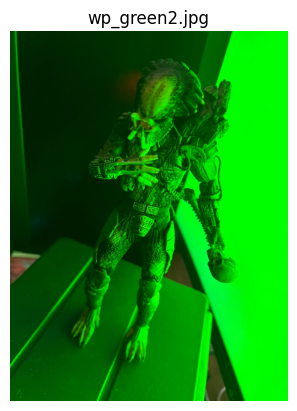

In [14]:
path_imagenes = os.listdir('white_patch')

imagenes = {}
for path in path_imagenes:
    imagen = cv.imread('white_patch/' + path)
    img_rgb = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)
    imagenes[path] = img_rgb

# Mostrar la primera imagen
plt.imshow(imagenes[path_imagenes[0]])
plt.title(path_imagenes[0])
plt.axis('off')
plt.show()

#### White patch

In [ ]:
def white_patch(img, path, percentil = [100, 100, 100]):
    img_float = img.astype(np.float32)

    print(f'Procesando imagen: {path}')

    # Normalizar cada canal
    max_r = np.percentile(img_float[:,:,2], percentil[0])
    print(f'Maximo valor de R: {np.max(img_float[:,:,2])}, Percentil {percentil[0]}: {max_r}')

    max_g = np.percentile(img_float[:,:,1], percentil[1])
    print(f'Maximo valor de G: {np.max(img_float[:,:,1])}, Percentil {percentil[1]}: {max_g}')
    
    max_b = np.percentile(img_float[:,:,0], percentil[2])
    print(f'Maximo valor de B: {np.max(img_float[:,:,0])}, Percentil {percentil[2]}: {max_b}')

    img_float[:,:,2] *= 255.0 / max_r
    img_float[:,:,1] *= 255.0 / max_g
    img_float[:,:,0] *= 255.0 / max_b

    # Limitar valores entre 0 y 255
    imagen = np.clip(img_float, 0, 255).astype(np.uint8)
    
    return imagen

def mostrar_resultado(img, img_white_patch, path):

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title(f'Imagen {path}')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(img_white_patch)
    plt.title(f'Imagen corregida')
    plt.axis('off')

    plt.show()

Procesando imagen: wp_green2.jpg
Maximo valor de R: 172.0, Percentil 100: 172.0
Maximo valor de G: 255.0, Percentil 100: 255.0
Maximo valor de B: 170.0, Percentil 100: 170.0


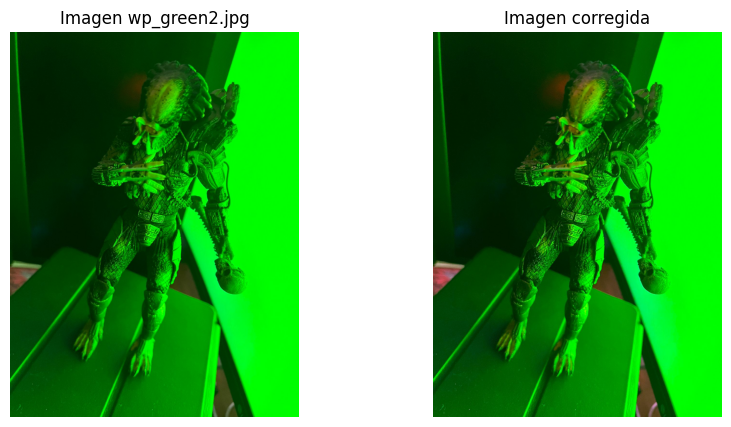

Procesando imagen: wp_red2.jpg
Maximo valor de R: 203.0, Percentil 100: 203.0
Maximo valor de G: 201.0, Percentil 100: 201.0
Maximo valor de B: 255.0, Percentil 100: 255.0


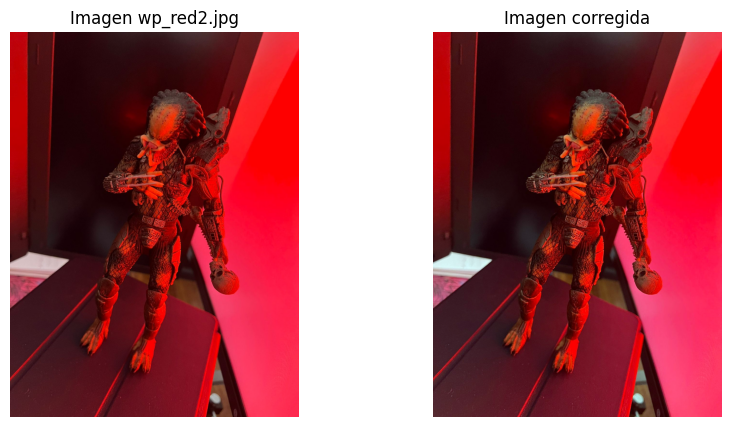

Procesando imagen: test_green.png
Maximo valor de R: 171.0, Percentil 100: 171.0
Maximo valor de G: 250.0, Percentil 100: 250.0
Maximo valor de B: 210.0, Percentil 100: 210.0


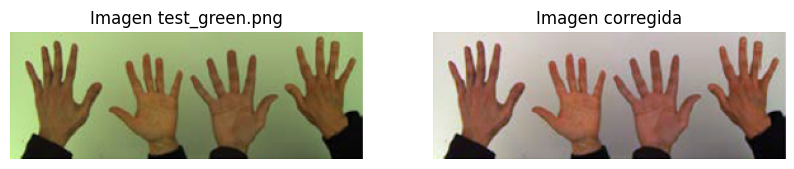

Procesando imagen: wp_red.png
Maximo valor de R: 122.0, Percentil 100: 122.0
Maximo valor de G: 134.0, Percentil 100: 134.0
Maximo valor de B: 255.0, Percentil 100: 255.0


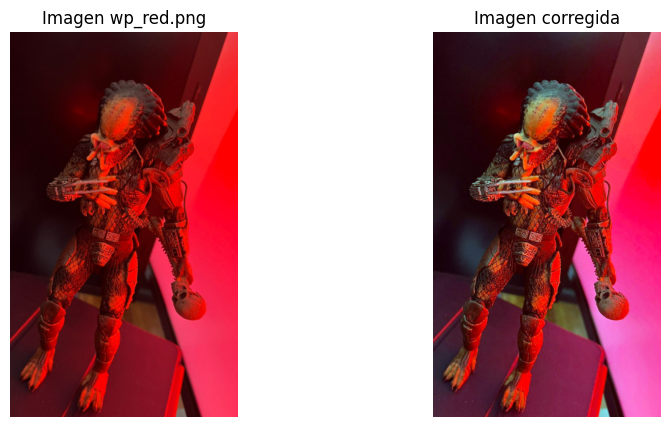

Procesando imagen: wp_green.png
Maximo valor de R: 155.0, Percentil 100: 155.0
Maximo valor de G: 252.0, Percentil 100: 252.0
Maximo valor de B: 126.0, Percentil 100: 126.0


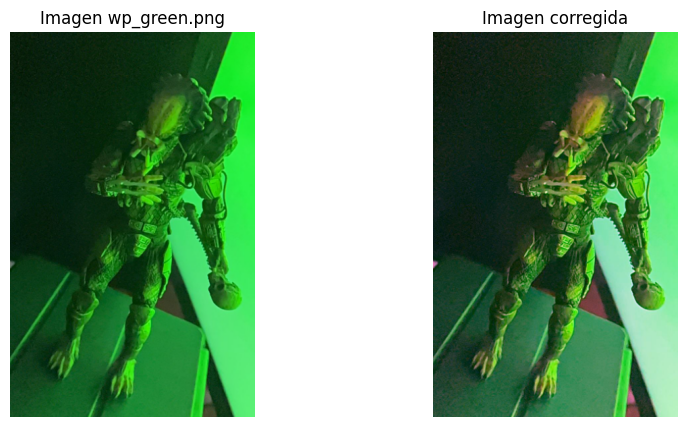

Procesando imagen: wp_blue.jpg
Maximo valor de R: 255.0, Percentil 100: 255.0
Maximo valor de G: 255.0, Percentil 100: 255.0
Maximo valor de B: 255.0, Percentil 100: 255.0


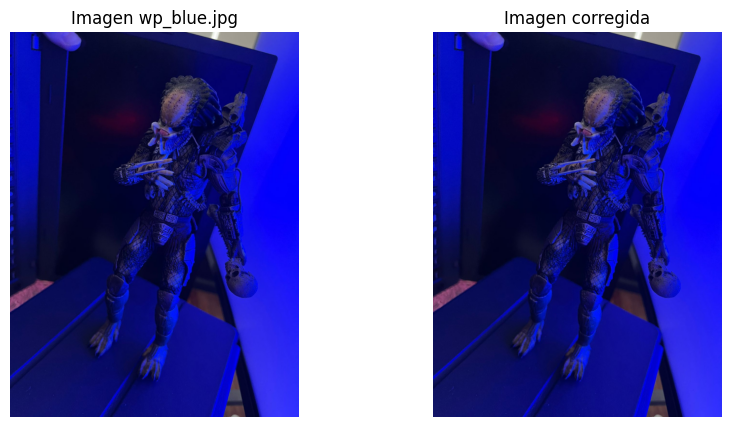

Procesando imagen: test_red.png
Maximo valor de R: 175.0, Percentil 100: 175.0
Maximo valor de G: 157.0, Percentil 100: 157.0
Maximo valor de B: 247.0, Percentil 100: 247.0


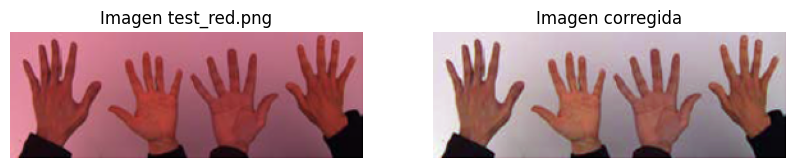

Procesando imagen: test_blue.png
Maximo valor de R: 200.0, Percentil 100: 200.0
Maximo valor de G: 138.0, Percentil 100: 138.0
Maximo valor de B: 165.0, Percentil 100: 165.0


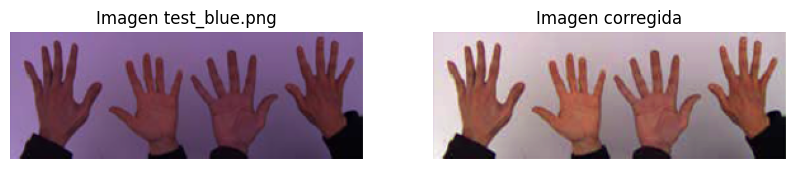

In [13]:
for path, imagen in imagenes.items():
    imagen_wp = white_patch(imagen, path)
    mostrar_resultado(imagen, imagen_wp, path)

El método White Patch funciona correctamente únicamente cuando los valores máximos de cada canal se encuentran dentro de un rango razonable (150 a 200) y no están saturados.

Las imagenes corregidas correctamente son:
- `test_blue.png`
- `test_green.png`
- `test_red.png`

Las imagenes cuyos canales tienen un canal con valor maximo de 255 (o cercano) pero el resto de <200, el algoritmo corrigue ligeramente la luz debido a que tiene poco rango para expandir el rango dinamico. Las imagenes son:
- `wp_green.png`
- `wp_red.png`


Las imagenes cuyos canales tienen uno o mas canales con valor maximo de 255 y el resto >200, el algoritmo mantiene la imagen original, sin correciones. Las imagenes son:
- `wp_green2.png`
- `wp_red2.png`
- `wp_blue.png`
- `wp_blue2.png`

Para solucionar este problema, en cada imagen se aplica un percentil diferente por canal. De esta manera se le otorga al algoritmo un margen para expandir el rango dinamico en los canales saturados sin afectar los que estan dentro de un rango razonable.

**wp_green**

Percentil [100, 100, 100]:
Procesando imagen: wp_green.png
Maximo valor de R: 155.0, Percentil 100: 155.0
Maximo valor de G: 252.0, Percentil 100: 252.0
Maximo valor de B: 126.0, Percentil 100: 126.0


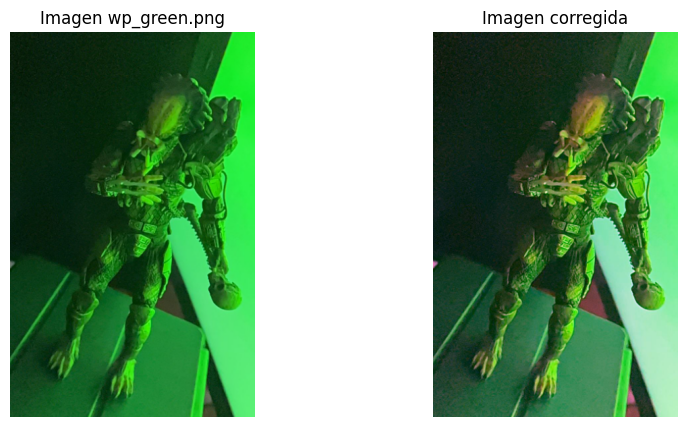

Percentil [100, 95, 100]:
Procesando imagen: wp_green.png
Maximo valor de R: 155.0, Percentil 100: 155.0
Maximo valor de G: 252.0, Percentil 95: 237.0
Maximo valor de B: 126.0, Percentil 100: 126.0


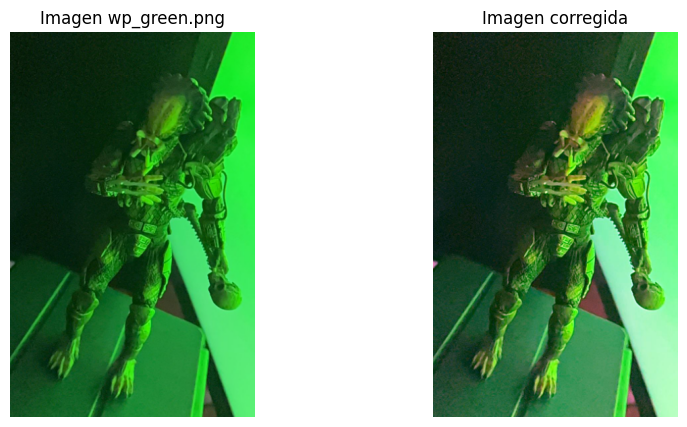

In [102]:
path = 'wp_green.png'

imagen = imagenes['wp_green.png']

print("Percentil [100, 100, 100]:")
imagen_wp = white_patch(imagen, path, [100, 100, 100])
mostrar_resultado(imagen, imagen_wp, path)

percentil = [100, 95, 100]
print(f"Percentil {percentil}:")
imagen_wp = white_patch(imagen, path, percentil)
mostrar_resultado(imagen, imagen_wp, path)

Percentil [100, 100, 100]:
Procesando imagen: wp_green2.jpg
Maximo valor de R: 172.0, Percentil 100: 172.0
Maximo valor de G: 255.0, Percentil 100: 255.0
Maximo valor de B: 170.0, Percentil 100: 170.0


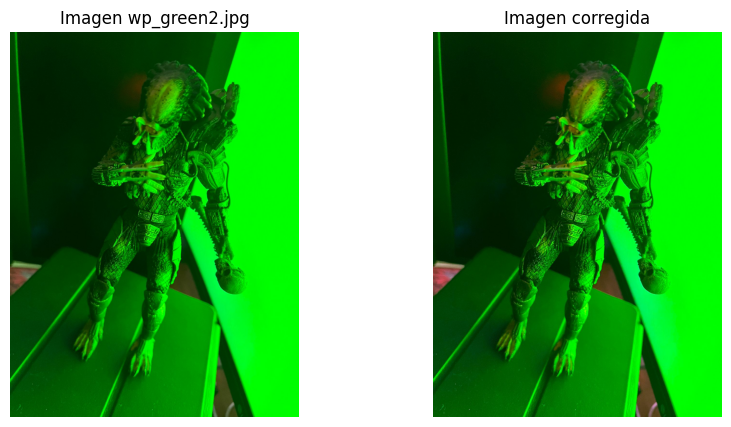

Percentil [100, 80, 100]:
Procesando imagen: wp_green2.jpg
Maximo valor de R: 172.0, Percentil 100: 172.0
Maximo valor de G: 255.0, Percentil 80: 252.0
Maximo valor de B: 170.0, Percentil 100: 170.0


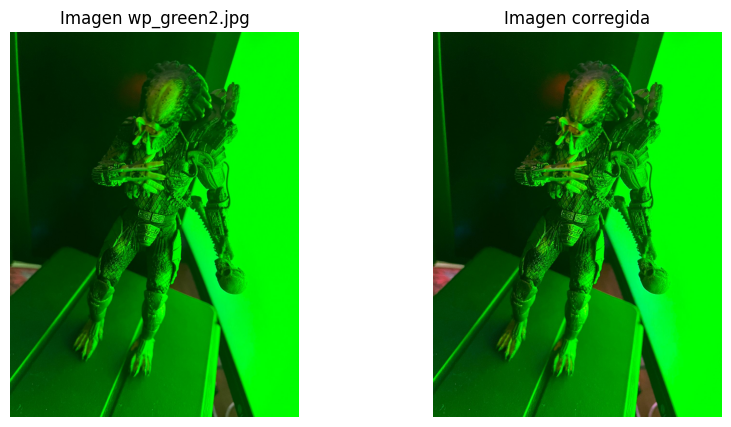

In [115]:
path = 'wp_green2.jpg'

imagen = imagenes[path]

print("Percentil [100, 100, 100]:")
imagen_wp = white_patch(imagen, path, [100, 100, 100])
mostrar_resultado(imagen, imagen_wp, path)

percentil = [100, 80, 100]
print(f"Percentil {percentil}:")
imagen_wp = white_patch(imagen, path, percentil)
mostrar_resultado(imagen, imagen_wp, path)

**wp_blue**

Percentil [100, 100, 100]:
Procesando imagen: wp_blue.jpg
Maximo valor de R: 255.0, Percentil 100: 255.0
Maximo valor de G: 255.0, Percentil 100: 255.0
Maximo valor de B: 255.0, Percentil 100: 255.0


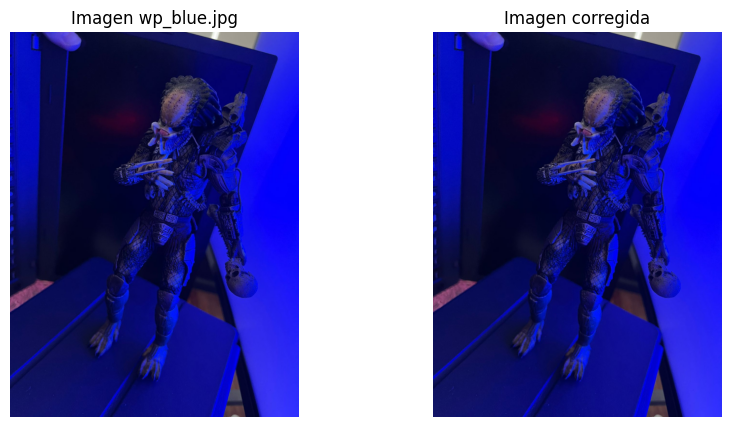

Percentil [95, 99, 99]:
Procesando imagen: wp_blue.jpg
Maximo valor de R: 255.0, Percentil 95: 252.0
Maximo valor de G: 255.0, Percentil 99: 86.0
Maximo valor de B: 255.0, Percentil 99: 117.0


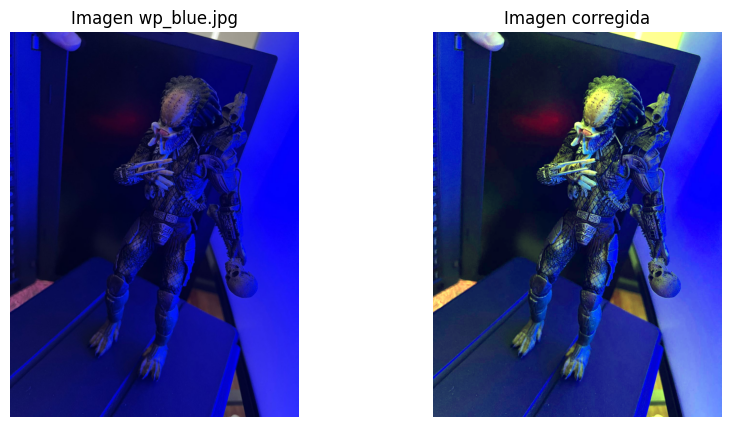

In [ ]:
path = 'wp_blue.jpg'

imagen = imagenes[path]

print("Percentil [100, 100, 100]:")
imagen_wp = white_patch(imagen, path, [100, 100, 100])
mostrar_resultado(imagen, imagen_wp, path)

percentil = [95, 99, 99]
print(f"Percentil {percentil}:")
imagen_wp = white_patch(imagen, path, percentil)
mostrar_resultado(imagen, imagen_wp, path)

**wp_red**

Percentil [100, 100, 100]:
Procesando imagen: wp_red.png
Maximo valor de R: 122.0, Percentil 100: 122.0
Maximo valor de G: 134.0, Percentil 100: 134.0
Maximo valor de B: 255.0, Percentil 100: 255.0


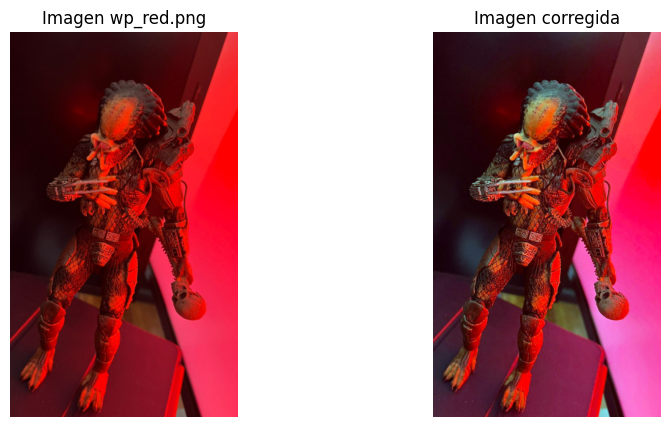

Percentil [100, 100, 90]:
Procesando imagen: wp_red.png
Maximo valor de R: 122.0, Percentil 100: 122.0
Maximo valor de G: 134.0, Percentil 100: 134.0
Maximo valor de B: 255.0, Percentil 90: 253.0


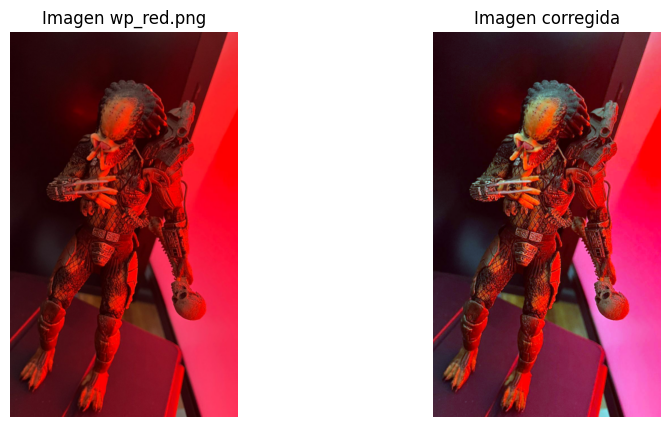

In [ ]:
path = 'wp_red.png'

imagen = imagenes[path]

print("Percentil [100, 100, 100]:")
imagen_wp = white_patch(imagen, path, [100, 100, 100])
mostrar_resultado(imagen, imagen_wp, path)

percentil = [100, 100, 90]
print(f"Percentil {percentil}:")
imagen_wp = white_patch(imagen, path, percentil)
mostrar_resultado(imagen, imagen_wp, path)

Percentil [100, 100, 100]:
Procesando imagen: wp_red2.jpg
Maximo valor de R: 203.0, Percentil 100: 203.0
Maximo valor de G: 201.0, Percentil 100: 201.0
Maximo valor de B: 255.0, Percentil 100: 255.0


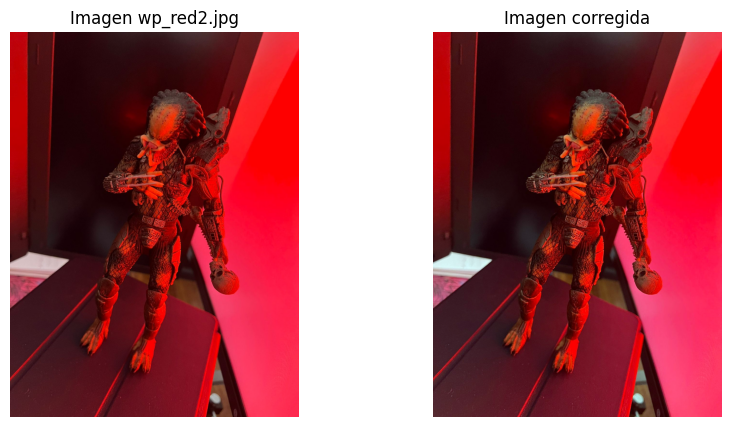

Percentil [99, 99, 90]:
Procesando imagen: wp_red2.jpg
Maximo valor de R: 203.0, Percentil 99: 119.0
Maximo valor de G: 201.0, Percentil 99: 119.0
Maximo valor de B: 255.0, Percentil 90: 254.0


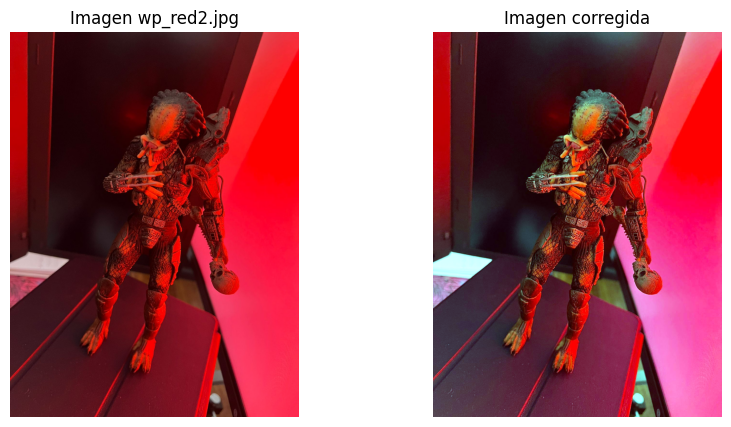

In [109]:
imagenes.keys()

path = 'wp_red2.jpg'

imagen = imagenes[path]

print("Percentil [100, 100, 100]:")
imagen_wp = white_patch(imagen, path, [100, 100, 100])
mostrar_resultado(imagen, imagen_wp, path)

percentil = [99, 99, 90]
print(f"Percentil {percentil}:")
imagen_wp = white_patch(imagen, path, percentil)
mostrar_resultado(imagen, imagen_wp, path)

#### Observaciones

El problema identificado es que White Patch utiliza el valor máximo de cada canal. En las imágenes procesadas, esos valores máximos están saturados lo que produce una corrección incorrecta.

Si un canal está saturado (255), es necesario bajar el percentil para evitar que el algoritmo tome un valor inválido como referencia.

Si un canal no está saturado, se mantiene un percentil alto, porque el valor máximo representa información útil.

Se tuvo que implementar una solución de compromiso:

- Percentiles bajos: corrección fuerte del color, pero mayor riesgo de saturación en las luces.
- Percentiles altos: poca saturación, pero corrección más suave.

## Parte 2

#### Importar imagenes

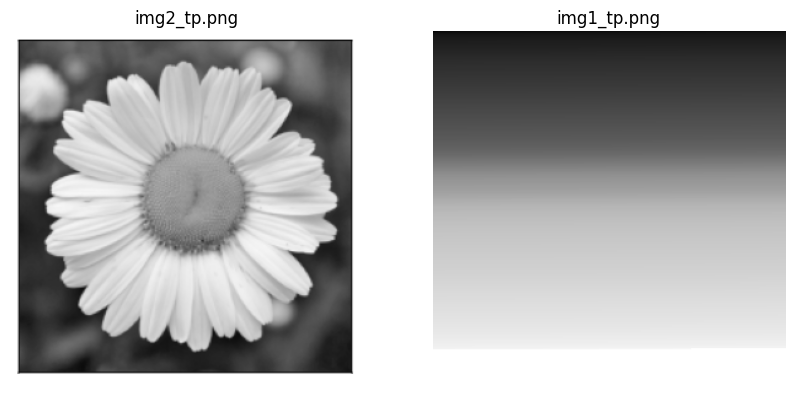

In [7]:
path_imagenes = os.listdir('img')

imagenes = {}
for path in path_imagenes:
    imagen = cv.imread('img/' + path)
    img_rgb = cv.cvtColor(imagen, cv.IMREAD_GRAYSCALE)
    imagenes[path] = img_rgb

# Visualizar imagenes
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(imagenes[path_imagenes[0]])
plt.title(path_imagenes[0])
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(imagenes[path_imagenes[1]])
plt.title(path_imagenes[1])
plt.axis('off')

plt.show()

#### Histogramas

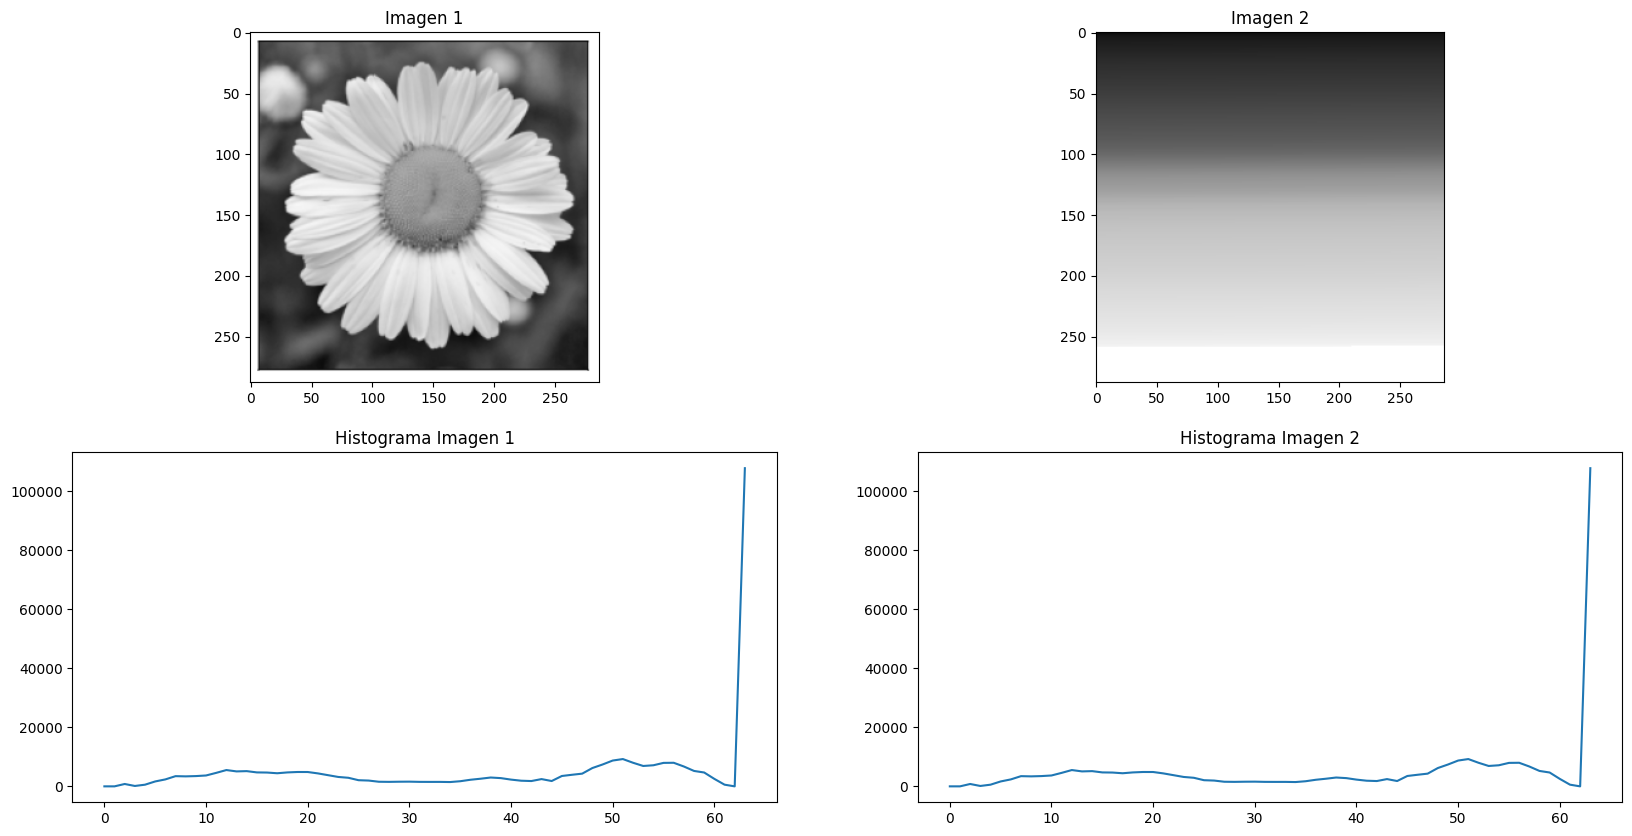

In [50]:
numero_bins = 64

fig = plt.figure(figsize=(20,10))

# Imagen 1
ax1=plt.subplot(221)
ax1.imshow(imagenes[path_imagenes[0]], cmap='gray', vmin=0, vmax=255)
ax1.set_title('Imagen 1')

hist1,bins1 = np.histogram(imagenes[path_imagenes[0]].ravel(),numero_bins,[0,256])
ax3=plt.subplot(223)
ax3.set_title('Histograma Imagen 1')
ax3.plot(hist1)

# Imagen 2
ax2=plt.subplot(222)
ax2.imshow(imagenes[path_imagenes[1]], cmap='gray', vmin=0, vmax=255)
ax2.set_title('Imagen 2')

hist2,bins2 = np.histogram(imagenes[path_imagenes[1]].ravel(),numero_bins,[0,256])
ax4=plt.subplot(224)
ax4.set_title('Histograma Imagen 2')
ax4.plot(hist2)

plt.show()

In [ ]:
if hist1.all() == hist1.all():
    print('Histogramas identicos')
else:
    print('Histogramas diferentes')

Histogramas identicos


In [48]:
print(f'Frecuencia en el máximo valor: {hist1[-1]}')

Frecuencia en el máximo valor: 107856


#### Observaciones

- Numero de bins: 64. 

- Se observa que:
    - Aunque la imagen 1 presente alto contraste visual y la imagen 2 cambie de negro a blanco progresivamente, ambas imagenes tienen exactamente el mismo histograma. 
    - El rango dinámico es máximo para 8 bits: 256 valores distintos.
    - Tiene maxima frecuencia en el máximo valor: 107856 pixeles en 255.
    - El histograma no es un buen indicador de información espacial (lineas, figuras, deteccion de objetos), pero si de la intensidad y su frecuencia.

- Features:
    - Rango dinámico para viabilidad de postprocesamiento de imagenes.
    - Saturacion de blancos.
    - El brillo de la imagen.
